In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = {
    "News": "Newsletter_Interaction_Data.csv",
    "Bugs": "Product_Bug_Task_Data.csv",
    "Regions": "RegionAndVertical_Data.csv",
    "Status": "StatusAndLevel_Data.csv",
    "CSAT": "CSAT_Survey_Data.csv",
    "Age": "Customer_Age_Data.csv",
    "MRR": "Customer_MRR_Data.csv",
    "Rev": "Customer_Revenue_Data.csv",
    "Tickets": "Help_Ticket_Data.csv",
}

In [3]:
dfs = {}
for k, v in files.items():
    try:
        dfs[k] = pd.read_csv(f"archive/{v}")
    except:
        print(f"couldn't load {v}")

In [4]:
# There is a mismatch between data files. In Customer Age Data, other than all the files Customer ID is written as "CRM ID"

dfs["Age"].rename(columns={"CRM ID": "Customer ID"}, inplace=True)

In [16]:
def fix_currency(x):
    x = str(x)
    return float(x.replace("$", "").replace(",", ""))
    


dfs["MRR"]["MRR"] = dfs["MRR"]["MRR"].apply(fix_currency)
dfs["Rev"]["Total Revenue"] = dfs["Rev"]["Total Revenue"].apply(fix_currency)

In [19]:
print(dfs["MRR"]["MRR"])
print(dfs["Rev"]["Total Revenue"])

0        8212.0
1        2026.0
2        2100.0
3        2900.0
4        1898.0
         ...   
1375      663.0
1376     6500.0
1377    10000.0
1378     1521.0
1379     2135.0
Name: MRR, Length: 1380, dtype: float64
0        732199.0
1             0.0
2        375135.0
3             0.0
4        116732.0
          ...    
896       16527.0
897           0.0
898      567026.0
899    15967518.0
900       30478.0
Name: Total Revenue, Length: 901, dtype: float64


In [ ]:
# lets check what we got
for name, df in dfs.items():
    print(f"{name}: {df['Customer ID'].nunique()} customers, {len(df)} rows")

News: 251 customers, 251 rows
Bugs: 640 customers, 1989 rows
Regions: 2651 customers, 2655 rows
Status: 2651 customers, 2655 rows
CSAT: 640 customers, 1989 rows
Age: 2651 customers, 2651 rows
MRR: 1380 customers, 1380 rows
Rev: 901 customers, 901 rows
Tickets: 1367 customers, 1367 rows


All of them includes different number of customers. And also when I examine the data I can see there is multiple number of same customers (by looking at the prints and see rows - customers > 0 in most and also looking at the data files itself). 

Now we must aggregate the data 


In [22]:
print(dfs["CSAT"].columns)

Index(['Customer ID', 'Year', 'Quarter', 'Survey Date', 'Response Date',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       'Please rate your understanding of our reporting capabilities in the panel'],
      dtype='object')


In [50]:
csat_cols = [
    "How likely are you to recommend insider to a friend or colleague ",
    "How would you rate the value you gain from our company",
    "Please rate the overall quality of our products",
    "Please rate the usability of the panel",
]

In [51]:
dfs["Bugs"] = (
    dfs["Bugs"].groupby("Customer ID", as_index=False)["Product Bug Task Count"].sum()
)
dfs["CSAT"] = dfs["CSAT"].groupby("Customer ID", as_index=False)[csat_cols].mean()

# mode for categorical stuff (found it on stackoverflow)
mode_agg = lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]
dfs["Regions"] = dfs["Regions"].groupby("Customer ID").agg(mode_agg).reset_index()
dfs["Status"] = dfs["Status"].groupby("Customer ID").agg(mode_agg).reset_index()

In [10]:
merged_df = dataframes["Customer Age"]

for key, df in dataframes.items():
    if key != "Customer Age":  # Zaten başlangıç noktası olarak kullanıyoruz
        merged_df = merged_df.merge(df, on="Customer ID", how="left")

In [11]:
print("Merged Satır Sayısı:", len(merged_df))

print("Unique Customer ID Sayısı:", merged_df["Customer ID"].nunique())

for name, df in dataframes.items():
    print(f"{name} veri setinde eşsiz müşteri sayısı:", df["Customer ID"].nunique())
    print(f"{name} veri setinde toplam satır sayısı:", len(df))


Merged Satır Sayısı: 2651
Unique Customer ID Sayısı: 2651
Newsletter Interaction veri setinde eşsiz müşteri sayısı: 251
Newsletter Interaction veri setinde toplam satır sayısı: 251
Product Bug Task veri setinde eşsiz müşteri sayısı: 640
Product Bug Task veri setinde toplam satır sayısı: 640
Region and Vertical veri setinde eşsiz müşteri sayısı: 2651
Region and Vertical veri setinde toplam satır sayısı: 2651
Status and Level veri setinde eşsiz müşteri sayısı: 2651
Status and Level veri setinde toplam satır sayısı: 2651
CSAT Survey veri setinde eşsiz müşteri sayısı: 640
CSAT Survey veri setinde toplam satır sayısı: 640
Customer Age veri setinde eşsiz müşteri sayısı: 2651
Customer Age veri setinde toplam satır sayısı: 2651
Customer MRR veri setinde eşsiz müşteri sayısı: 1380
Customer MRR veri setinde toplam satır sayısı: 1380
Customer Revenue veri setinde eşsiz müşteri sayısı: 901
Customer Revenue veri setinde toplam satır sayısı: 901
Help Ticket veri setinde eşsiz müşteri sayısı: 1367
He

In [12]:
missing_values = merged_df.isnull().sum()
missing_percentage = (missing_values / len(merged_df)) * 100

missing_df = pd.DataFrame({"Eksik Değer Sayısı": missing_values, "Eksik Veri (%)": missing_percentage})
missing_df = missing_df[missing_df["Eksik Değer Sayısı"] > 0]  

print("\nEksik Veri Analizi:")
print(missing_df)



Eksik Veri Analizi:
                                                    Eksik Değer Sayısı  \
Company Newsletter Interaction Count                              2400   
Product Bug Task Count                                            2013   
Region                                                               1   
Vertical                                                            66   
Subvertical                                                        102   
Customer Level                                                       1   
How likely are you to recommend insider to a fr...                2013   
How would you rate the value you gain from our ...                2013   
Please rate the overall quality of our products                   2013   
Please rate the usability of the panel                            2018   
MRR                                                               1319   
Total Revenue                                                     1750   
Help Ticket Count

In [13]:
merged_df["Company Newsletter Interaction Count"] = merged_df["Company Newsletter Interaction Count"].fillna(0)
merged_df["Product Bug Task Count"] = merged_df["Product Bug Task Count"].fillna(0)
csat_columns = [
    "How likely are you to recommend insider to a friend or colleague ",
    "How would you rate the value you gain from our company",
    "Please rate the overall quality of our products",
    "Please rate the usability of the panel"
]

numeric_cols = merged_df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())
merged_df["MRR"] = merged_df["MRR"].fillna(0)
merged_df["Total Revenue"] = merged_df["Total Revenue"].fillna(0)
merged_df["Help Ticket Count"] =merged_df["Help Ticket Count"].fillna(0)
merged_df["Help Ticket Lead Time (hours)"]=merged_df["Help Ticket Lead Time (hours)"].fillna(0)
categorical_columns = ["Region", "Vertical", "Subvertical", "Customer Level"]

for col in categorical_columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])  

In [14]:
print(merged_df.isnull().sum())

Customer ID                                                          0
Customer Age (Months)                                                0
Company Newsletter Interaction Count                                 0
Product Bug Task Count                                               0
Region                                                               0
Vertical                                                             0
Subvertical                                                          0
Status                                                               0
Customer Level                                                       0
How likely are you to recommend insider to a friend or colleague     0
How would you rate the value you gain from our company               0
Please rate the overall quality of our products                      0
Please rate the usability of the panel                               0
MRR                                                                  0
Total 

Veri Seti Temizlendi

In [15]:
print(merged_df.describe())

       Customer Age (Months)  Company Newsletter Interaction Count  \
count            2651.000000                           2651.000000   
mean               20.077707                              0.417955   
std                16.427542                              2.096620   
min                 1.000000                              0.000000   
25%                 7.000000                              0.000000   
50%                15.000000                              0.000000   
75%                27.000000                              0.000000   
max                72.000000                             54.000000   

       Product Bug Task Count  \
count             2651.000000   
mean               105.884949   
std                236.127209   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max               1665.000000   

       How likely are you to recommend insider to a friend or colleague

In [16]:
print(merged_df.dtypes)

Customer ID                                                           object
Customer Age (Months)                                                  int64
Company Newsletter Interaction Count                                 float64
Product Bug Task Count                                               float64
Region                                                                object
Vertical                                                              object
Subvertical                                                           object
Status                                                                object
Customer Level                                                        object
How likely are you to recommend insider to a friend or colleague     float64
How would you rate the value you gain from our company               float64
Please rate the overall quality of our products                      float64
Please rate the usability of the panel                               float64

<Figure size 1200x800 with 0 Axes>

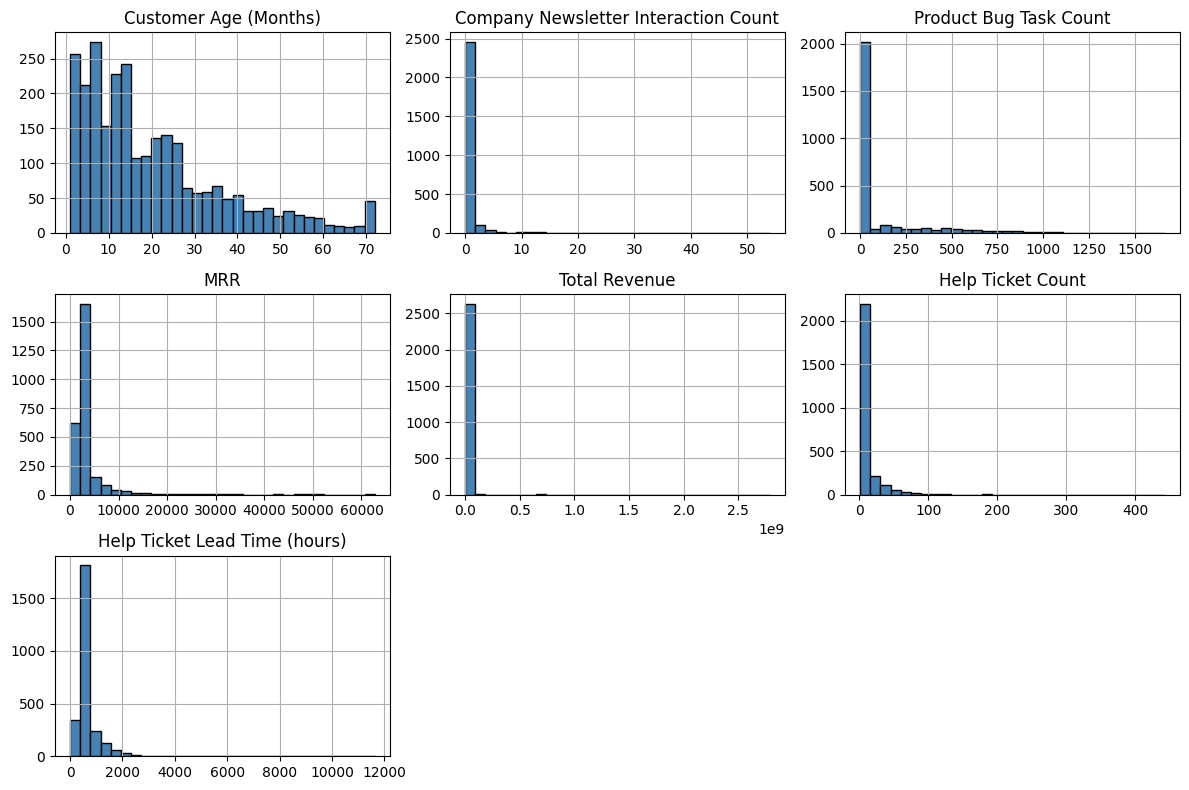

In [17]:
numeric_columns = ["Customer Age (Months)", "Company Newsletter Interaction Count", 
                   "Product Bug Task Count", "MRR", "Total Revenue", 
                   "Help Ticket Count", "Help Ticket Lead Time (hours)"]

plt.figure(figsize=(12, 8))
merged_df[numeric_columns].hist(bins=30, figsize=(12, 8), layout=(3, 3), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()


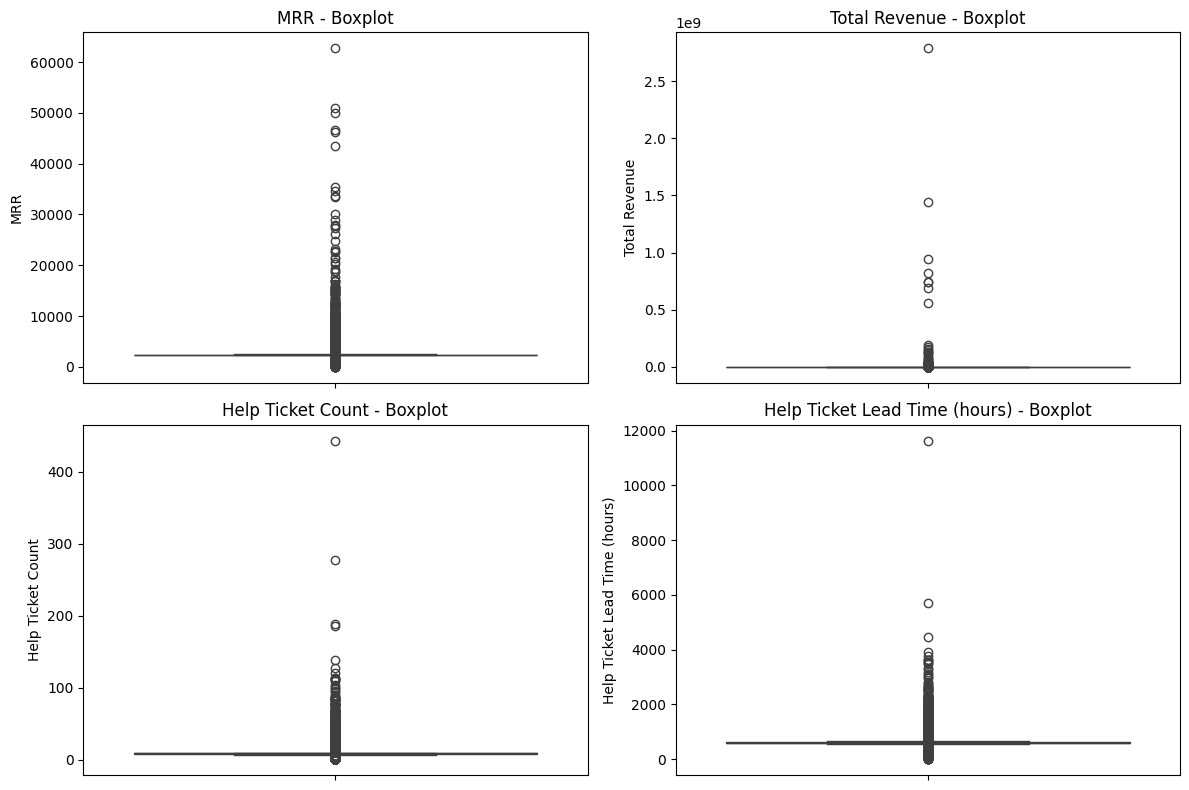

In [18]:
plt.figure(figsize=(12, 8))
numeric_columns = ["MRR", "Total Revenue", "Help Ticket Count", "Help Ticket Lead Time (hours)"]

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=merged_df[col])
    plt.title(f"{col} - Boxplot")

plt.tight_layout()
plt.show()

In [19]:
outlier_thresholds = {}

numeric_columns = ["MRR", "Total Revenue", "Help Ticket Count", "Help Ticket Lead Time (hours)"]

for col in numeric_columns:
    q99 = merged_df[col].quantile(0.99)  
    outlier_thresholds[col] = q99
    print(f"{col} için %99'luk eşik: {q99}")


MRR için %99'luk eşik: 18200.0
Total Revenue için %99'luk eşik: 31837480.5
Help Ticket Count için %99'luk eşik: 84.5
Help Ticket Lead Time (hours) için %99'luk eşik: 2584.0


In [20]:
for col, threshold in outlier_thresholds.items():
    merged_df[col] = merged_df[col].apply(lambda x: min(x, threshold))  

In [21]:
print(merged_df[numeric_columns].describe())

                MRR  Total Revenue  Help Ticket Count  \
count   2651.000000   2.651000e+03        2651.000000   
mean    3025.686156   6.891981e+05          12.892305   
std     2789.761860   3.739556e+06          14.540094   
min       26.000000   0.000000e+00           1.000000   
25%     2369.500000   6.074100e+04           8.000000   
50%     2385.000000   6.074100e+04           9.000000   
75%     2409.500000   6.074100e+04           9.000000   
max    18200.000000   3.183748e+07          84.500000   

       Help Ticket Lead Time (hours)  
count                    2651.000000  
mean                      687.222180  
std                       403.237162  
min                         0.000000  
25%                       588.000000  
50%                       603.000000  
75%                       622.000000  
max                      2584.000000  


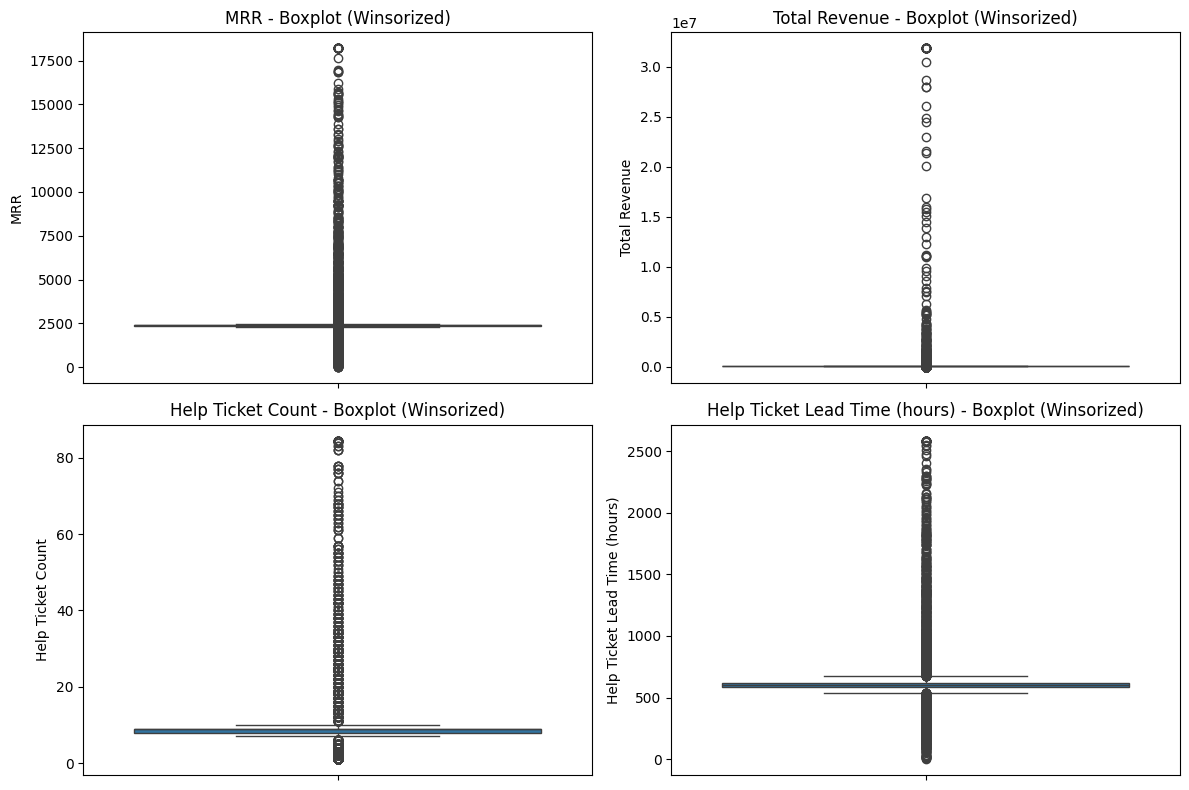

In [22]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=merged_df[col])
    plt.title(f"{col} - Boxplot (Winsorized)")

plt.tight_layout()
plt.show()

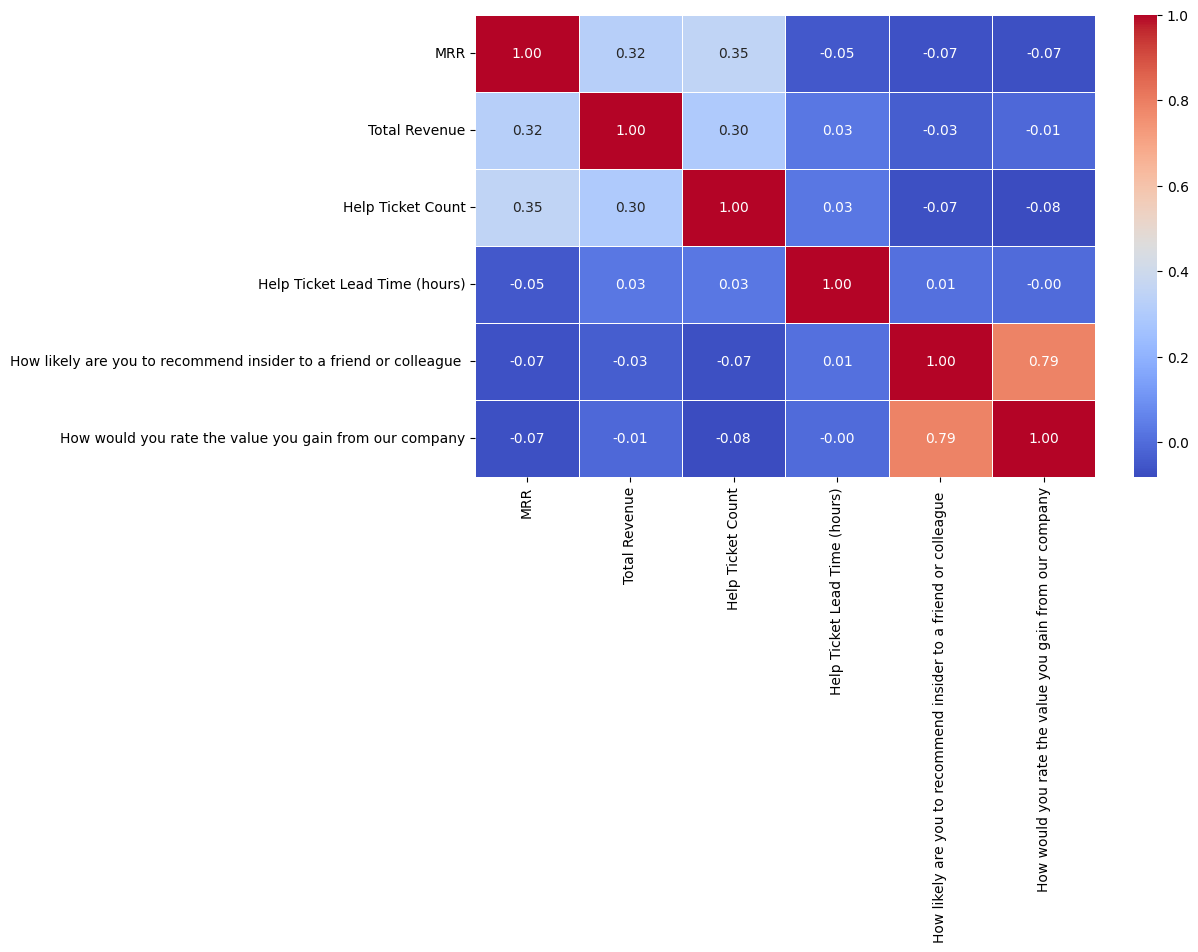

In [23]:
correlation_matrix = merged_df[["MRR", "Total Revenue", "Help Ticket Count", 
                                "Help Ticket Lead Time (hours)", 
                                "How likely are you to recommend insider to a friend or colleague ",
                                "How would you rate the value you gain from our company"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

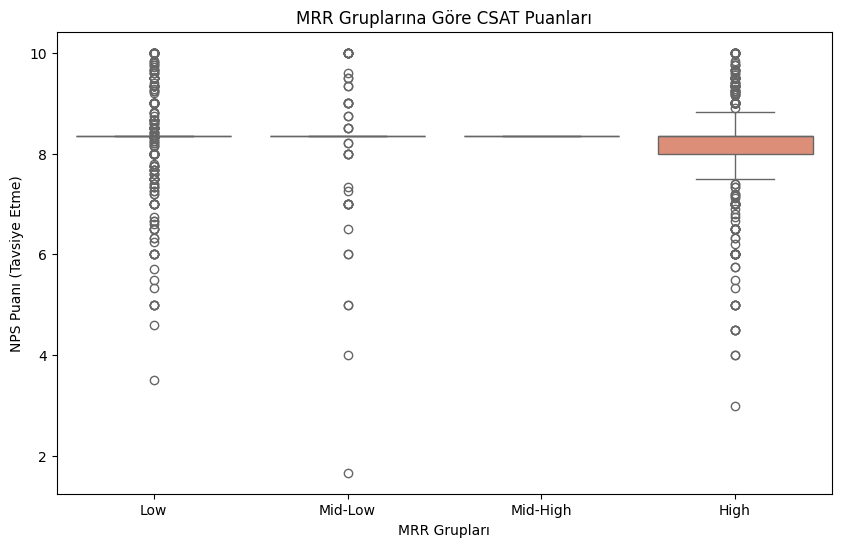

In [24]:
merged_df["MRR Group"] = pd.qcut(merged_df["MRR"], 4, labels=["Low", "Mid-Low", "Mid-High", "High"]) 
plt.figure(figsize=(10, 6))
sns.boxplot(x="MRR Group", y="How likely are you to recommend insider to a friend or colleague ", 
            data=merged_df, hue="MRR Group", legend=False, palette="coolwarm")
plt.title("MRR Gruplarına Göre CSAT Puanları")
plt.xlabel("MRR Grupları")
plt.ylabel("NPS Puanı (Tavsiye Etme)")
plt.show()

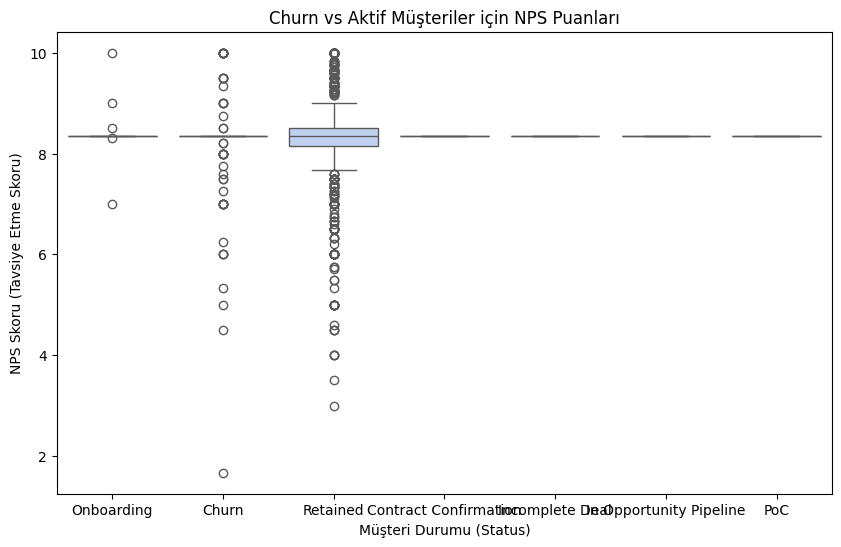

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Status", y="How likely are you to recommend insider to a friend or colleague ", data=merged_df, palette="coolwarm", hue="Status", legend=False)
plt.title("Churn vs Aktif Müşteriler için NPS Puanları")
plt.xlabel("Müşteri Durumu (Status)")
plt.ylabel("NPS Skoru (Tavsiye Etme Skoru)")
plt.show()

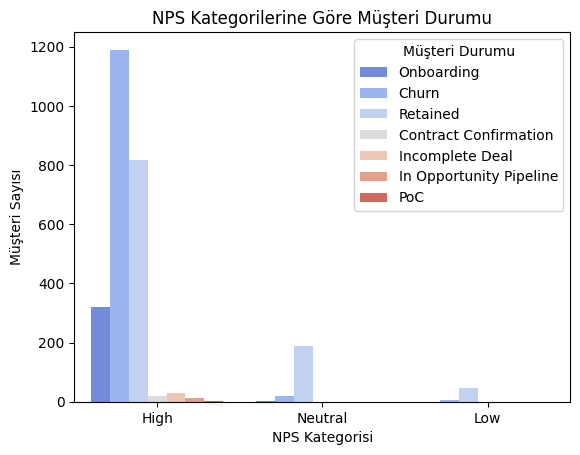

In [27]:
def categorize_nps(score):
    if score <= 6:
        return "Low"
    elif 7 <= score <= 8:
        return "Neutral"
    else:
        return "High"
    
merged_df["NPS Category"] = merged_df["How likely are you to recommend insider to a friend or colleague "].apply(categorize_nps)

plt.figure
sns.countplot(x="NPS Category", hue="Status" , data=merged_df, palette="coolwarm")
plt.title("NPS Kategorilerine Göre Müşteri Durumu")
plt.xlabel("NPS Kategorisi")
plt.ylabel("Müşteri Sayısı")
plt.legend(title="Müşteri Durumu")
plt.show()

İlginç bir şekilde her ne kadar oran olarak düşük NPS müşteriler daha fazla churn ediyor olsa da yüksek NPS müşterilerinin çok büyük bir kısmı churn etmiş durumda

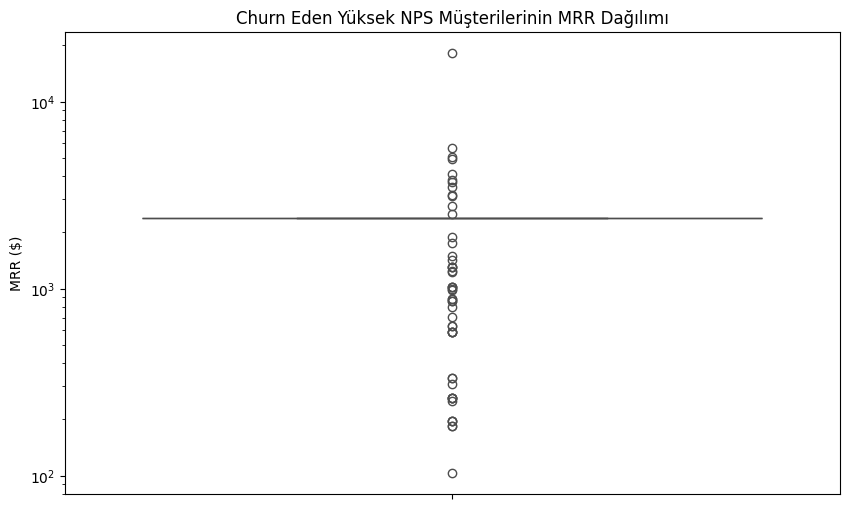

In [31]:
high_nps_churn = merged_df[(merged_df["NPS Category"] == "High") & (merged_df["Status"] == "Churn")]

plt.figure(figsize=(10, 6))
sns.boxplot(y=high_nps_churn["MRR"], color="red")
plt.title("Churn Eden Yüksek NPS Müşterilerinin MRR Dağılımı")
plt.ylabel("MRR ($)")
plt.yscale("log")  
plt.show()

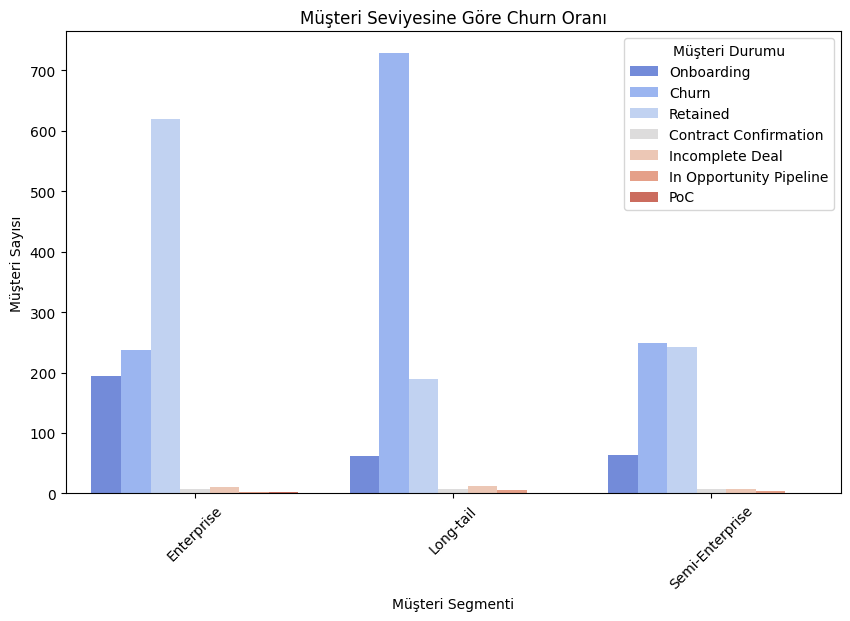

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Customer Level", hue="Status", data=merged_df, palette="coolwarm")
plt.title("Müşteri Seviyesine Göre Churn Oranı")
plt.xlabel("Müşteri Segmenti")
plt.ylabel("Müşteri Sayısı")
plt.legend(title="Müşteri Durumu")
plt.xticks(rotation=45)
plt.show()

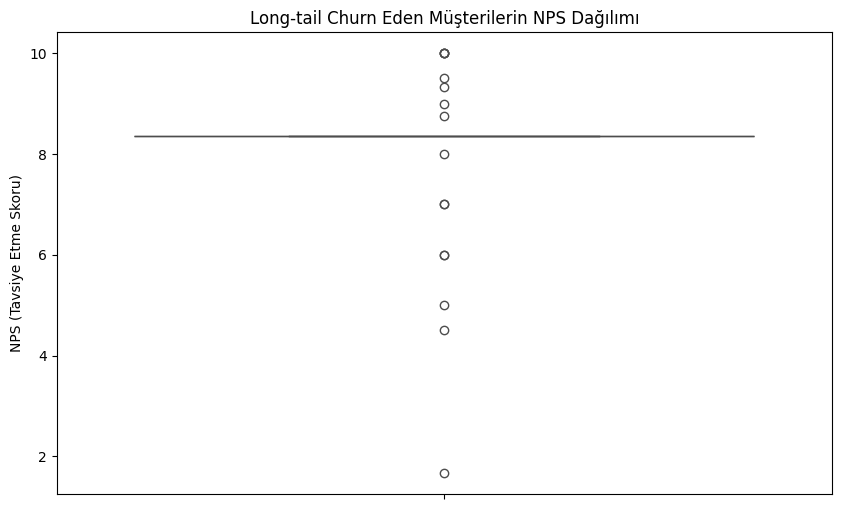

In [36]:
long_tail_churn = merged_df[(merged_df["Customer Level"] == "Long-tail") & (merged_df["Status"] == "Churn")]

plt.figure(figsize=(10, 6))
sns.boxplot(y=long_tail_churn["How likely are you to recommend insider to a friend or colleague "], color="red")
plt.title("Long-tail Churn Eden Müşterilerin NPS Dağılımı")
plt.ylabel("NPS (Tavsiye Etme Skoru)")
plt.show()

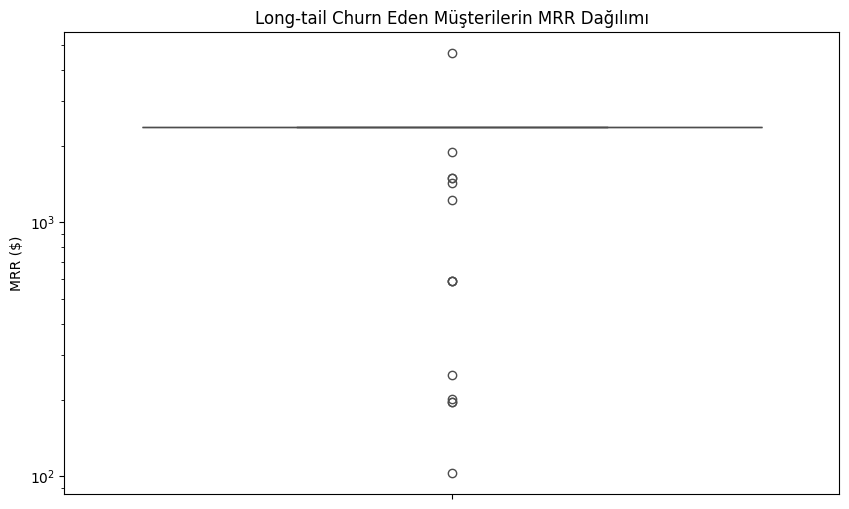

In [37]:
long_tail_churn = merged_df[(merged_df["Customer Level"] == "Long-tail") & (merged_df["Status"] == "Churn")]

plt.figure(figsize=(10, 6))
sns.boxplot(y=long_tail_churn["MRR"], color="red")
plt.title("Long-tail Churn Eden Müşterilerin MRR Dağılımı")
plt.ylabel("MRR ($)")
plt.yscale("log")  
plt.show()

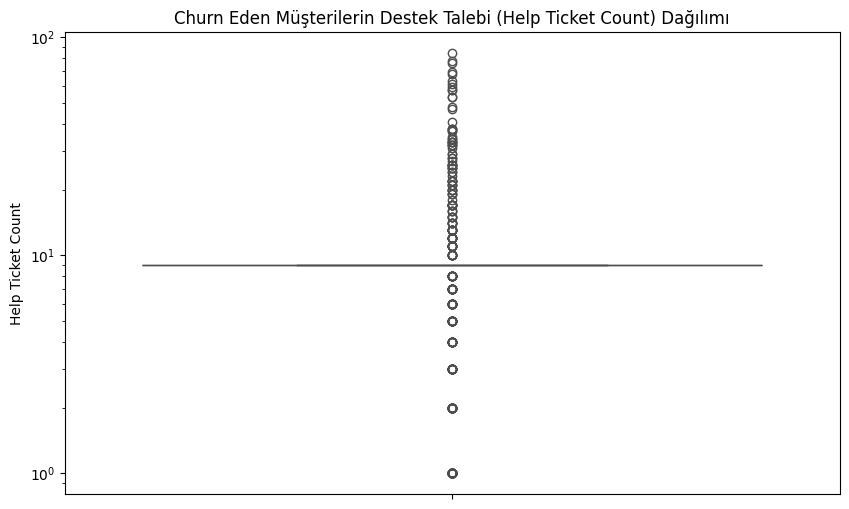

In [38]:
churn_customers = merged_df[merged_df["Status"] == "Churn"]

plt.figure(figsize=(10, 6))
sns.boxplot(y=churn_customers["Help Ticket Count"], color="red")
plt.title("Churn Eden Müşterilerin Destek Talebi (Help Ticket Count) Dağılımı")
plt.ylabel("Help Ticket Count")
plt.yscale("log") 

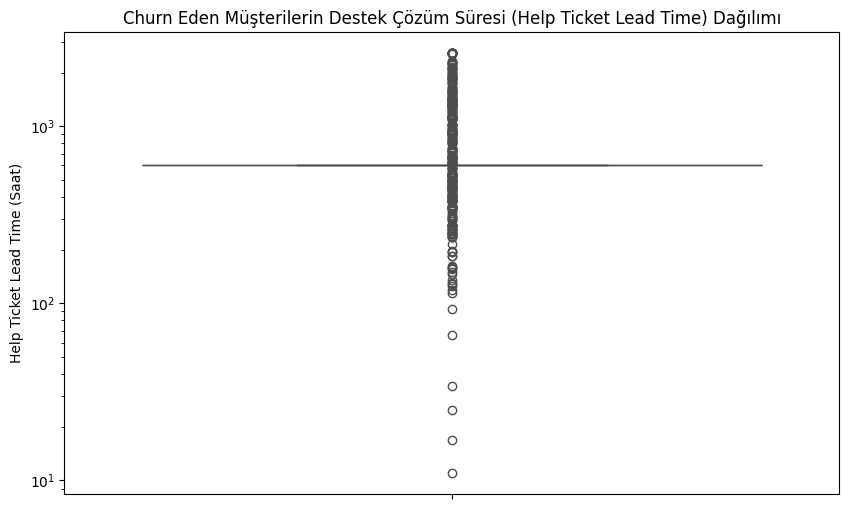

In [40]:
churn_customers = merged_df[merged_df["Status"] == "Churn"]

plt.figure(figsize=(10, 6))
sns.boxplot(y=churn_customers["Help Ticket Lead Time (hours)"], color="red")
plt.title("Churn Eden Müşterilerin Destek Çözüm Süresi (Help Ticket Lead Time) Dağılımı")
plt.ylabel("Help Ticket Lead Time (Saat)")
plt.yscale("log")  
plt.show()

firmanın müşteri deneyimiyle ilgili gerçekten büyük problemleri görünüyor. çözüm süreleri olması gerekenin çok üstünde ve müşteriler bu sebeple churn etmiş olabilir

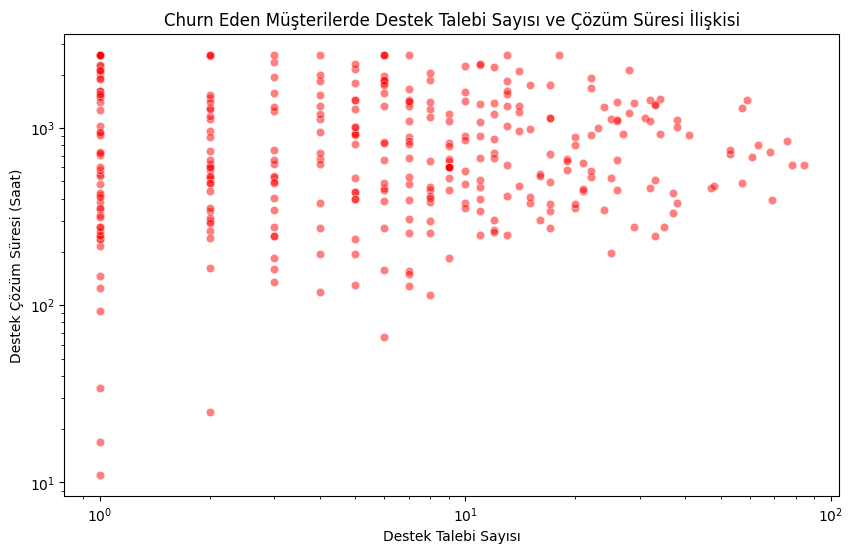

In [42]:
churn_customers = merged_df[merged_df["Status"] == "Churn"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=churn_customers["Help Ticket Count"], y=churn_customers["Help Ticket Lead Time (hours)"], alpha=0.5, color="red")
plt.title("Churn Eden Müşterilerde Destek Talebi Sayısı ve Çözüm Süresi İlişkisi")
plt.xlabel("Destek Talebi Sayısı")
plt.ylabel("Destek Çözüm Süresi (Saat)")
plt.xscale("log")  # Daha iyi görünmesi için log-scale kullanıyoruz
plt.yscale("log")
plt.show()

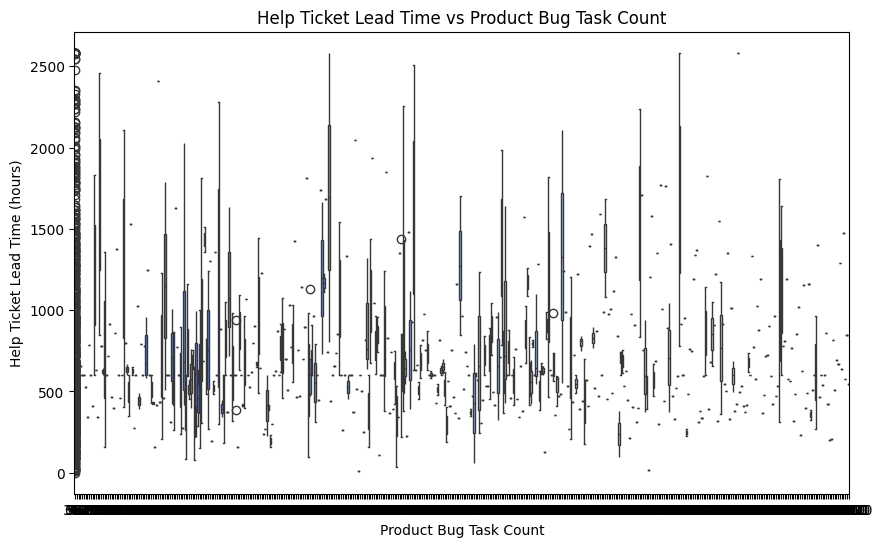

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df["Product Bug Task Count"], 
            y=merged_df["Help Ticket Lead Time (hours)"], 
            hue=merged_df["Product Bug Task Count"],  
            legend=False,  
            palette="coolwarm")

plt.title("Help Ticket Lead Time vs Product Bug Task Count")
plt.xlabel("Product Bug Task Count")
plt.ylabel("Help Ticket Lead Time (hours)")
plt.show()